## The first part of this code contains { TSFEL+SMOTE+Selection+RFC-Rfe+XGBoost }
## The 2nd part of this code contains { TSFEL+SMOTE+Selection+Ensemble (RFC-Rfe+SVM) }

In [1]:
import tsfel
import time

import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from imblearn.over_sampling import SMOTE
#import wfdb


ecg_labels = ['N','S','V','F','Q']

# Features extracted using TSFEL and stored in excel files
## Reading those excel files

In [2]:
X_N_total=pd.read_excel("X_N_total.xlsx")
X_S_total=pd.read_excel("X_S_total.xlsx")
X_V_total=pd.read_excel("X_V_total.xlsx")
X_F_total=pd.read_excel("X_F_total.xlsx")
X_Q_total=pd.read_excel("X_Q_total.xlsx")

# Applying Train-Test Split 

In [3]:
y_N1=pd.Series("1" for i in range(len(X_N_total)))
y_S1=pd.Series("2" for i in range(len(X_S_total)))
y_V1=pd.Series("3" for i in range(len(X_V_total)))
y_F1=pd.Series("4" for i in range(len(X_F_total)))
y_Q1=pd.Series("5" for i in range(len(X_Q_total)))

X_train_N, X_test_N, y_train_N, y_test_N = train_test_split(X_N_total, y_N1,test_size=0.40,random_state=42)
X_train_S, X_test_S, y_train_S, y_test_S = train_test_split(X_S_total, y_S1,test_size=0.40,random_state=42)
X_train_V, X_test_V, y_train_V, y_test_V = train_test_split(X_V_total, y_V1,test_size=0.40,random_state=42)
X_train_F, X_test_F, y_train_F, y_test_F = train_test_split(X_F_total, y_F1,test_size=0.40,random_state=42)
X_train_Q, X_test_Q, y_train_Q, y_test_Q = train_test_split(X_Q_total, y_Q1,test_size=0.40,random_state=42)

frames_X_train=[X_train_N,X_train_S,X_train_V,X_train_F,X_train_Q]
frames_X_test=[X_test_N,X_test_S,X_test_V,X_test_F,X_test_Q]
frames_y_train=[y_train_N,y_train_S,y_train_V,y_train_F,y_train_Q]
frames_y_test=[y_test_N,y_test_S,y_test_V,y_test_F,y_test_Q]

X_train_smt=pd.concat(frames_X_train, ignore_index=True)
X_test=pd.concat(frames_X_test, ignore_index=True)
y_train_smt=pd.concat(frames_y_train, ignore_index=True)
y_test=pd.concat(frames_y_test, ignore_index=True)

# Balancing 'Train' portion by SMOTE

In [4]:
%%time
smt=SMOTE(sampling_strategy='auto',random_state=42)
X_train, y_train = smt.fit_resample(X_train_smt,y_train_smt)

Wall time: 13.4 s


## Initial no. of instances in 'Train' portion in each of five classes

In [5]:
y_train_smt.value_counts()

1    54057
3     4204
2     1668
4      481
5        9
dtype: int64

## No.of instances in 'Train' portion after balancing 

In [6]:
y_train.value_counts()

3    54057
1    54057
2    54057
4    54057
5    54057
dtype: int64

## No. of instances in 'Test' portion, no balancing is applied

In [7]:
y_test.value_counts()

1    36038
3     2804
2     1113
4      321
5        6
dtype: int64

# Feature Selection

In [8]:
%%time
# Feature Selection

# Highly correlated features are removed
corr_features = tsfel.correlated_features(X_train)
X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)



# Normalising Features
min_max_scaler = preprocessing.StandardScaler()
nX_train = min_max_scaler.fit_transform(X_train)
nX_test = min_max_scaler.transform(X_test)

# Remove low variance features
selector = VarianceThreshold()
X_train = selector.fit_transform(nX_train)
X_test = selector.transform(nX_test)

Wall time: 1min 22s


In [9]:
corr_features

['0_Area under the curve',
 '0_Autocorrelation',
 '0_ECDF Percentile_1',
 '0_FFT mean coefficient_101',
 '0_FFT mean coefficient_102',
 '0_FFT mean coefficient_103',
 '0_FFT mean coefficient_104',
 '0_FFT mean coefficient_105',
 '0_FFT mean coefficient_106',
 '0_FFT mean coefficient_107',
 '0_FFT mean coefficient_108',
 '0_FFT mean coefficient_109',
 '0_FFT mean coefficient_110',
 '0_FFT mean coefficient_111',
 '0_FFT mean coefficient_112',
 '0_FFT mean coefficient_113',
 '0_FFT mean coefficient_114',
 '0_FFT mean coefficient_115',
 '0_FFT mean coefficient_116',
 '0_FFT mean coefficient_117',
 '0_FFT mean coefficient_118',
 '0_FFT mean coefficient_119',
 '0_FFT mean coefficient_120',
 '0_FFT mean coefficient_121',
 '0_FFT mean coefficient_122',
 '0_FFT mean coefficient_123',
 '0_FFT mean coefficient_124',
 '0_FFT mean coefficient_125',
 '0_FFT mean coefficient_126',
 '0_FFT mean coefficient_127',
 '0_FFT mean coefficient_128',
 '0_FFT mean coefficient_38',
 '0_FFT mean coefficient_40',

# Applying Recursive Feature Elimination on Random Forest Classifier(RFC-RFE)
## RFC-RFE has already been done and results noted, hence commenting this portion

In [ ]:
'''
%%time
# RFECV with Random Forest
estimator = RandomForestClassifier(random_state=42)
rfecv = RFECV(estimator, step=3, min_features_to_select=76, cv=StratifiedKFold(3), scoring='accuracy', n_jobs=-1)
rfecv.fit(nX_train, y_train.ravel())
'''

In [ ]:
'''
%matplotlib notebook
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()
'''

In [ ]:
#print("Optimal number of features : %d" % rfecv.n_features_)

In [ ]:
'''
nX_train=pd.DataFrame(nX_train)
nX_test=pd.DataFrame(nX_test)
'''

In [ ]:
'''
print("Features/Columns to eliminate/drop :- "np.where(rfecv.support_ == False)[0])
nX_train.drop(nX_train.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)
nX_test.drop(nX_train.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)
'''

## Removing unimportant features obtained from RFE

In [12]:
nX_test=pd.DataFrame(X_test)
nX_train=pd.DataFrame(X_train)

In [13]:
nX_test

,0,1,2,3,4,5,6,7,8,9,...,106,107,108,109,110,111,112,113,114,115
0,0.165393,0.672773,0.750033,-0.305795,0.014233,-0.408106,-0.581977,-0.822028,-0.123803,-0.815244,...,0.639746,-0.366241,-0.645874,0.377683,-0.266713,0.290674,0.033311,-0.194867,-0.264387,0.797216
1,0.190912,-0.344107,0.685728,1.194777,0.014233,-0.426247,-0.538709,-0.885242,-0.124195,-1.046277,...,-0.282321,0.883597,-0.398214,-0.499781,0.355279,0.160288,-0.080614,-0.579466,-0.770962,-0.942882
2,-0.135130,0.018771,-0.156186,-0.406487,0.014233,-0.454034,-0.429770,-0.767930,-0.124309,-0.978362,...,-0.268330,1.798522,-1.636510,-0.799853,0.356362,0.121587,-0.093916,-0.455166,-0.545705,-1.598911
3,-0.248351,0.279040,0.175062,2.006897,0.014233,-0.451157,-0.629537,0.529402,-0.093340,0.621032,...,1.369317,-0.615340,-0.645874,-0.491750,1.708244,-0.213311,-0.111830,0.507626,0.677190,0.730201
4,-0.215396,0.276131,0.169616,0.955713,0.014233,-0.449860,-0.632757,0.631368,-0.123439,0.699766,...,1.130346,-0.080871,-0.893533,-0.488306,1.838828,-0.218656,-0.216336,0.248899,0.504260,0.407741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40277,-0.638333,-0.857159,-0.518779,-0.501865,0.014233,-0.254848,-0.326159,-0.942780,-0.103903,-1.071009,...,-0.446760,-0.769161,1.583058,0.622436,-1.205382,-1.645734,-2.012150,-2.188508,-2.083777,1.084542
40278,-1.300196,2.407192,-1.097731,-0.409039,0.014233,0.381655,1.470821,-0.439047,-0.058622,-0.334537,...,-0.576385,-1.215563,-0.645874,0.522472,-1.452748,-0.596182,0.174619,0.526702,0.488496,0.257087
40279,0.050842,-0.888730,0.013669,0.006712,0.014233,-0.456481,0.218744,-0.163656,-0.123212,-0.398440,...,-0.499732,0.685707,-0.893533,-0.672094,-0.920857,0.142078,0.008940,-0.318067,-0.385769,-1.004748
40280,-0.686223,-0.495449,-0.109839,-0.211158,0.014233,-0.454736,-0.586175,-1.034804,-0.124396,-1.085631,...,-0.878342,-0.354510,-1.636510,0.415695,-1.411882,-0.527152,-0.785643,-1.217693,-1.449366,0.028117


In [14]:
nX_train=nX_train.drop(columns=[4,27,28,30,31,32,35,41,43,44,49,54,55,58,59,63,64,65,66,71,73,75,100,108])
nX_test=nX_test.drop(columns=[4,27,28,30,31,32,35,41,43,44,49,54,55,58,59,63,64,65,66,71,73,75,100,108])

In [15]:
nX_train

,0,1,2,3,5,6,7,8,9,10,...,105,106,107,109,110,111,112,113,114,115
0,0.382232,-0.008297,0.923910,-0.368306,-0.449964,-0.622421,-0.567739,-0.120835,-0.517221,-0.408226,...,0.176096,1.023803,-0.241642,-0.509733,1.334598,0.588311,0.645179,0.529795,0.231271,0.223028
1,-1.262938,0.252526,-0.898756,0.281099,-0.357370,-0.626105,0.891047,-0.050376,1.032476,1.276194,...,0.913258,1.716388,-0.645074,-0.372410,1.367215,-1.665932,-1.254076,0.455371,0.863177,1.900779
2,-1.196409,0.302648,-0.912600,0.176102,-0.438644,-0.626019,0.978419,-0.120253,1.101402,1.204142,...,0.843739,1.407324,-0.830661,-0.713825,1.609373,-1.318097,-1.137723,0.035292,0.513124,1.125429
3,0.224080,-0.170743,0.716441,3.031726,-0.455079,-0.553776,-0.545408,-0.124380,-0.656535,-0.653423,...,0.405348,0.370649,1.893022,-1.106176,0.320562,0.387501,0.147389,-0.206655,-0.370586,-0.340366
4,-1.431598,-0.080701,-1.120660,0.373228,-0.422994,-0.624479,0.845879,-0.084588,0.837686,1.242848,...,1.106857,1.701929,-0.590851,-0.393388,1.411674,-1.745431,-1.382152,0.175373,0.658451,1.888705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270280,0.489923,-1.689820,0.317581,-0.751399,0.259635,0.911631,-0.996654,-0.124381,-1.053674,-0.998503,...,-0.097885,-1.702959,-0.399955,0.521826,-1.737651,-0.057287,-0.269989,-0.785592,-1.027564,-1.057695
270281,1.320444,-2.434880,-0.000153,-0.990855,6.227866,3.319430,-0.674292,-0.124403,-0.537415,-0.900349,...,-1.258725,-2.433157,0.797798,-0.345953,-2.032818,-1.201947,-1.361394,-1.794409,-2.004334,0.434772
270282,0.061300,-1.568500,-0.717474,-0.802094,2.997316,1.393851,0.180296,-0.113747,0.048230,-0.080775,...,-0.430336,-1.359367,0.384614,-0.562799,-1.121386,0.047143,0.089585,-0.036150,-0.052851,0.219346
270283,0.788231,-2.201977,-0.017145,-0.882577,2.871368,2.275761,-0.855275,-0.124380,-0.835592,-0.958333,...,-0.761917,-2.183502,0.244932,-0.003765,-1.909527,-0.791218,-0.984170,-1.444172,-1.631475,-0.742672


In [16]:
nX_test

,0,1,2,3,5,6,7,8,9,10,...,105,106,107,109,110,111,112,113,114,115
0,0.165393,0.672773,0.750033,-0.305795,-0.408106,-0.581977,-0.822028,-0.123803,-0.815244,-0.765963,...,0.785020,0.639746,-0.366241,0.377683,-0.266713,0.290674,0.033311,-0.194867,-0.264387,0.797216
1,0.190912,-0.344107,0.685728,1.194777,-0.426247,-0.538709,-0.885242,-0.124195,-1.046277,-0.917471,...,0.438164,-0.282321,0.883597,-0.499781,0.355279,0.160288,-0.080614,-0.579466,-0.770962,-0.942882
2,-0.135130,0.018771,-0.156186,-0.406487,-0.454034,-0.429770,-0.767930,-0.124309,-0.978362,-0.966997,...,0.139875,-0.268330,1.798522,-0.799853,0.356362,0.121587,-0.093916,-0.455166,-0.545705,-1.598911
3,-0.248351,0.279040,0.175062,2.006897,-0.451157,-0.629537,0.529402,-0.093340,0.621032,0.826815,...,0.316058,1.369317,-0.615340,-0.491750,1.708244,-0.213311,-0.111830,0.507626,0.677190,0.730201
4,-0.215396,0.276131,0.169616,0.955713,-0.449860,-0.632757,0.631368,-0.123439,0.699766,0.717879,...,0.299532,1.130346,-0.080871,-0.488306,1.838828,-0.218656,-0.216336,0.248899,0.504260,0.407741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40277,-0.638333,-0.857159,-0.518779,-0.501865,-0.254848,-0.326159,-0.942780,-0.103903,-1.071009,-0.838392,...,1.078319,-0.446760,-0.769161,0.622436,-1.205382,-1.645734,-2.012150,-2.188508,-2.083777,1.084542
40278,-1.300196,2.407192,-1.097731,-0.409039,0.381655,1.470821,-0.439047,-0.058622,-0.334537,0.218240,...,-0.070944,-0.576385,-1.215563,0.522472,-1.452748,-0.596182,0.174619,0.526702,0.488496,0.257087
40279,0.050842,-0.888730,0.013669,0.006712,-0.456481,0.218744,-0.163656,-0.123212,-0.398440,-0.570936,...,-0.312085,-0.499732,0.685707,-0.672094,-0.920857,0.142078,0.008940,-0.318067,-0.385769,-1.004748
40280,-0.686223,-0.495449,-0.109839,-0.211158,-0.454736,-0.586175,-1.034804,-0.124396,-1.085631,-1.000745,...,1.878371,-0.878342,-0.354510,0.415695,-1.411882,-0.527152,-0.785643,-1.217693,-1.449366,0.028117


# Part 1: Applying XGBoost Classifier

In [28]:
%%time
#xgboost classifier with 92 features

import xgboost as xgb
regressor = xgb.XGBClassifier(n_jobs=-1)
regressor.fit(nX_train, y_train)

Wall time: 21min 19s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [29]:
%%time
#xgboost classifier with 92 features

y_test_predict = regressor.predict(nX_test)

Wall time: 824 ms


In [30]:
%%time
#xgboost classifier with 92 features
# Get the classification report

accuracy = accuracy_score(y_test, y_test_predict) * 100
print(classification_report(y_test, y_test_predict, target_names=ecg_labels, zero_division=0, digits=4))
print("Accuracy: ", round(accuracy,2), '%')

              precision    recall  f1-score   support

           N     0.9885    0.9944    0.9915     36038
           S     0.8955    0.7853    0.8368      1113
           V     0.9630    0.9479    0.9554      2804
           F     0.8517    0.7695    0.8085       321
           Q     0.0000    0.0000    0.0000         6

    accuracy                         0.9835     40282
   macro avg     0.7398    0.6994    0.7184     40282
weighted avg     0.9829    0.9835    0.9831     40282

Accuracy:  98.35 %
Wall time: 1.18 s


In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Sensitivity:',recall_score(y_test, y_test_predict, average = 'micro'))

Sensitivity: 0.9834665607467356


<IPython.core.display.Javascript object>


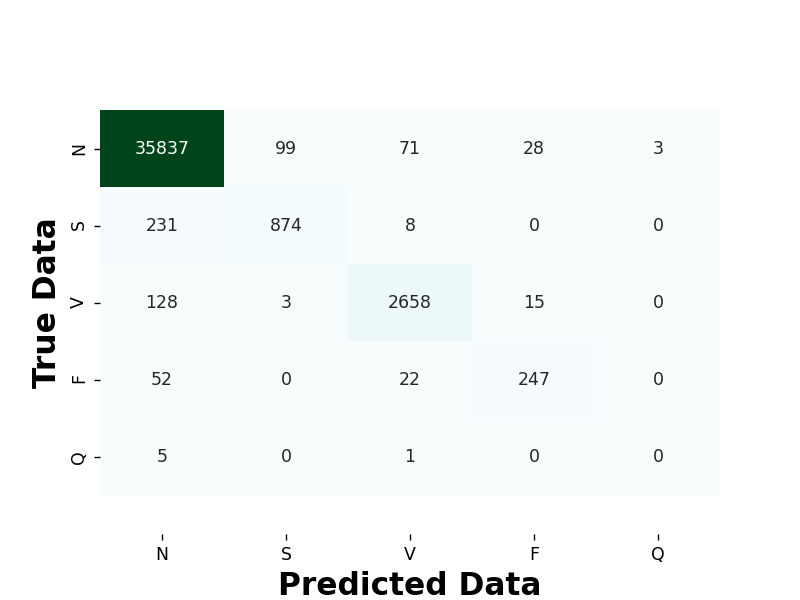

In [31]:
#xgboost classifier with 92 features
# Confusion Matrix
%matplotlib notebook
cm = confusion_matrix(y_test, y_test_predict)
df_cm = pd.DataFrame(cm, index=[i for i in ecg_labels], columns=[i for i in ecg_labels])
plt.figure()
ax= sns.heatmap(df_cm,  cbar=False, cmap="BuGn", annot=True, fmt="d")
plt.setp(ax.get_xticklabels(), rotation=0)

plt.ylabel('True Data', fontweight='bold', fontsize = 18)
plt.xlabel('Predicted Data', fontweight='bold', fontsize = 18)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

# Part 2: Applying Ensemble of Random Forest Classifier and SVM

## Applying Random Forest Classifier with 92 features

In [15]:
#random forest classifier with 92 features
# Training

#Random Forest Classifier
classifier = RandomForestClassifier(random_state=42, n_jobs=-1)
# Train the classifier
classifier.fit(nX_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [16]:
classifier

RandomForestClassifier(n_jobs=-1, random_state=42)

In [17]:
#random forest classifier with 92 features
y_test_predict = classifier.predict(nX_test)

In [18]:
y_test_predict

array(['1', '1', '1', ..., '3', '1', '1'], dtype=object)

In [19]:
#random forest classifier with 92 features
# Get the classification report

accuracy = accuracy_score(y_test, y_test_predict) * 100
print(classification_report(y_test, y_test_predict, target_names=ecg_labels, zero_division=0, digits=4))
print("Accuracy: ", round(accuracy,2), '%')

              precision    recall  f1-score   support

           N     0.9890    0.9908    0.9899     36038
           S     0.8672    0.7628    0.8117      1113
           V     0.9247    0.9597    0.9419      2804
           F     0.8328    0.7445    0.7862       321
           Q     0.0000    0.0000    0.0000         6

    accuracy                         0.9802     40282
   macro avg     0.7227    0.6916    0.7059     40282
weighted avg     0.9797    0.9802    0.9798     40282

Accuracy:  98.02 %


## Applying SVM with 92 features

In [20]:
#svm with 92 features
from sklearn.svm import SVC
clf = SVC().fit(nX_train, y_train.ravel())

In [21]:
clf

SVC()

In [22]:
#svm with 92 features
y_test_predict = clf.predict(nX_test)

In [23]:
#svm with 92 features
# Get the classification report

accuracy = accuracy_score(y_test, y_test_predict) * 100
print(classification_report(y_test, y_test_predict, target_names=ecg_labels, zero_division=0, digits=4))
print("Accuracy: ", round(accuracy,2), '%')

              precision    recall  f1-score   support

           N     0.9909    0.9736    0.9822     36038
           S     0.5628    0.8329    0.6717      1113
           V     0.9377    0.9444    0.9410      2804
           F     0.6952    0.8598    0.7688       321
           Q     0.0000    0.0000    0.0000         6

    accuracy                         0.9667     40282
   macro avg     0.6373    0.7221    0.6728     40282
weighted avg     0.9729    0.9667    0.9689     40282

Accuracy:  96.67 %


<IPython.core.display.Javascript object>


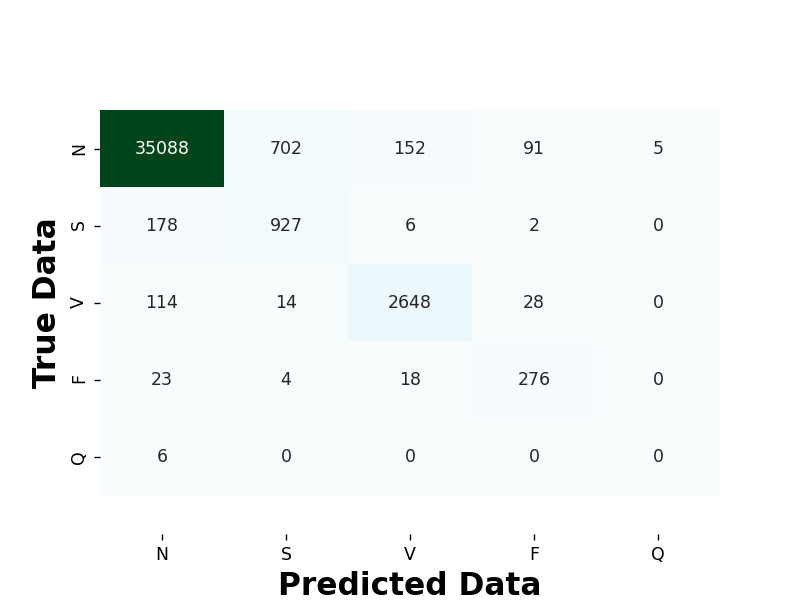

In [24]:
#svm with 92 features
# Confusion Matrix
%matplotlib notebook
cm = confusion_matrix(y_test, y_test_predict)
df_cm = pd.DataFrame(cm, index=[i for i in ecg_labels], columns=[i for i in ecg_labels])
plt.figure()
ax= sns.heatmap(df_cm,  cbar=False, cmap="BuGn", annot=True, fmt="d")
plt.setp(ax.get_xticklabels(), rotation=0)

plt.ylabel('True Data', fontweight='bold', fontsize = 18)
plt.xlabel('Predicted Data', fontweight='bold', fontsize = 18)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

## Applying Ensemble

In [26]:
#ensemble(rfc+svm) with 92 features
from sklearn.ensemble import VotingClassifier
ensemble=VotingClassifier(estimators=[('rfc', classifier), ('svm', clf)], voting='hard', n_jobs=-1).fit(nX_train, y_train)
print('The accuracy for Random Forest and SVM is:',ensemble.score(nX_test,y_test))

The accuracy for Random Forest and SVM is: 0.9821260116180924


In [27]:
ensemble

VotingClassifier(estimators=[('rfc',
                              RandomForestClassifier(n_jobs=-1,
                                                     random_state=42)),
                             ('svm', SVC())],
                 n_jobs=-1)

In [42]:
ensemble.voting

'hard'

In [22]:
#ensemble(rfc+svm) with 92 features
y_test_predict = ensemble.predict(nX_test)

In [26]:
#ensemble(rfc+svm) with 92 features
# Get the classification report

accuracy = accuracy_score(y_test, y_test_predict) * 100
print(classification_report(y_test, y_test_predict, target_names=ecg_labels, zero_division=0, digits=4))
print("Accuracy: ", round(accuracy,2), '%')

              precision    recall  f1-score   support

           N     0.9867    0.9950    0.9908     36038
           S     0.9008    0.7421    0.8138      1113
           V     0.9590    0.9422    0.9505      2804
           F     0.8835    0.7321    0.8007       321
           Q     0.0000    0.0000    0.0000         6

    accuracy                         0.9821     40282
   macro avg     0.7460    0.6823    0.7112     40282
weighted avg     0.9814    0.9821    0.9815     40282

Accuracy:  98.21 %


<IPython.core.display.Javascript object>


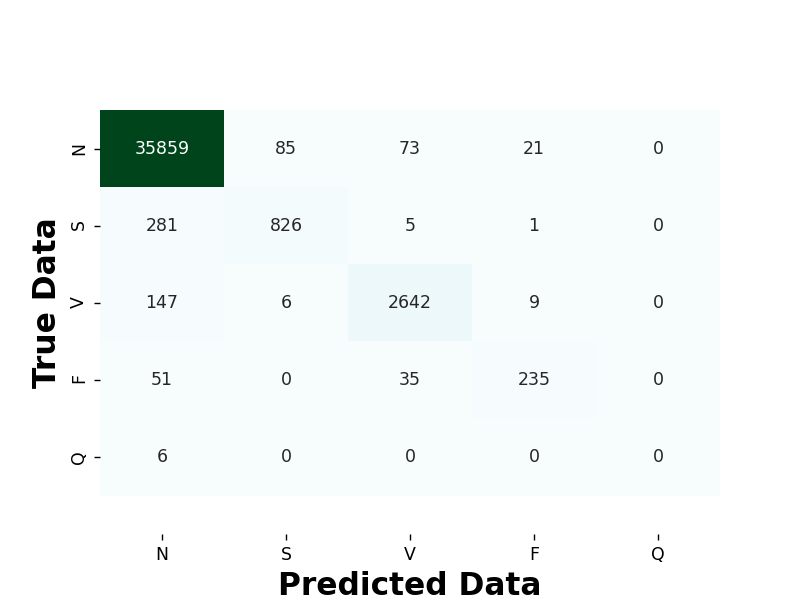

In [27]:
#ensemble(rfc+svm) with 92 features
# Confusion Matrix
%matplotlib notebook
cm = confusion_matrix(y_test, y_test_predict)
df_cm = pd.DataFrame(cm, index=[i for i in ecg_labels], columns=[i for i in ecg_labels])
plt.figure()
ax= sns.heatmap(df_cm,  cbar=False, cmap="BuGn", annot=True, fmt="d")
plt.setp(ax.get_xticklabels(), rotation=0)

plt.ylabel('True Data', fontweight='bold', fontsize = 18)
plt.xlabel('Predicted Data', fontweight='bold', fontsize = 18)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()